In [ ]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors  import    KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# LOAD DATASET
df= pd.read_csv('/content/Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
# UNDERSTAND YOUR DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27896 non-null  object 
 2   Age                                    27893 non-null  float64
 3   City                                   27900 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27896 non-null  object 
 11  Di

In [ ]:
# Target variable is Depression Column

In [ ]:
# identify missing values
df.isnull().sum()

,0
id,0
Gender,5
Age,8
City,1
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
#Summary of Numeric and descriptive columns

In [ ]:
#%pip install skimpy
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 27901  │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 18     │ │ int64       │ 6     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA %           ┃ mean      ┃ sd      ┃ p0 ┃ p25   ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ id             │  0 │              0 │     70440 │   40640 │  2 │ 35040 │ 70680 │ 105800 │ 140700 │ ██████ │  │
│ │ Age            │  8 │ 0.028672807426 │     25.82 │   4.906 │ 18 │    21 │    25 │     30 │     59 │  █▇▃   │  │
│ │                │    │         257125 │           │         │    │       │       │        │        │        │  │
│ │ Academic       │  0 │              0 │     3.141 │   1.381 │  0 │     2 │     3 │      4 │      5 │  ▅▄█▆▇ │  │
│ │ Pressure       │    │                │           │         │    │       │       │        │        │        │  │
│ │ Work Pressure  │  0 │              0 │ 0.0004301 │ 0.04399 │  0 │     0 │     0 │      0 │      5 │   █    │  │
│ │ CGPA           │  0 │              0 │     7.656 │   1.471 │  0 │  6.29 │  7.77 │   8.92 │     10 │    ▆▇█ │  │
│ │ Study          │  0 │              0 │     2.944 │   1.361 │  0 │     2 │     3 │      4 │      5 │  ▇▇▇█▆ │  │
│ │ Satisfaction   │    │                │           │         │    │       │       │        │        │        │  │
│ │ Job            │  0 │              0 │  0.000681 │ 0.04439 │  0 │     0 │     0 │      0 │      4 │   █    │  │
│ │ Satisfaction   │    │                │           │         │    │       │       │        │        │        │  │
│ │ Work/Study     │  3 │ 0.010752302784 │     7.157 │   3.708 │  0 │     4 │     8 │     10 │     12 │ ▂▂▂▃▄█ │  │
│ │ Hours          │    │          84642 │           │         │    │       │       │        │        │        │  │
│ │ Financial      │  3 │ 0.010752302784 │      3.14 │   1.437 │  1 │     2 │     3 │      4 │      5 │ ▆▆ ▆▇█ │  │
│ │ Stress         │    │          84642 │           │         │    │       │       │        │        │        │  │
│ │ Depression     │  0 │              0 │    0.5855 │  0.4926 │  0 │     0 │     1 │      1 │      1 │ ▆    █ │  │
│ └────────────────┴────┴────────────────┴───────────┴─────────┴────┴───────┴───────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃    ┃           ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA ┃ NA %      ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━

In [ ]:
# de.describe only give detailed outline for numeric columns
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27893.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27898.000000,27901.000000
mean,70442.149421,25.822500,3.141214,0.000430,7.656104,2.943837,0.000681,7.157036,3.139867,0.585499
std,40641.175216,4.905979,1.381465,0.043992,1.470707,1.361148,0.044394,3.707748,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [ ]:
# select those data types that include numeric values and provide those column names
# same goes for categorical and textual columns
# df.select_dtypes(include=['category', 'object']).columns:

df.select_dtypes(include='number').columns


Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

In [ ]:
# Fill missing categorical values with mode with a loop
for col in df.select_dtypes(include=['category', 'object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.select_dtypes(include=['category', 'object']).columns

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [ ]:
# Fill missing numeric values with median with a loop
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# identify missing values remains

# seems like we still have some null values in our categorical / textual columns
df.isnull().sum()

,0
id,0
Gender,5
Age,0
City,1
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].replace(r'^\s*$', pd.NA, regex=True)
# “in this column, turn any cell that is empty or only spaces/tabs/newlines into a real missing value (NA).”

# regex is a tiny language for finding patterns in text.
# instead of checking each character yourself, you write a short pattern, and python matches strings that fit that pattern.
# pd.NA is pandas’ missing value marker (works consistently across strings and the new nullable dtypes).

In [ ]:
# blank strings like "" or " " are not true missing values; models and encoders might treat them as a real category.

# turning them into NA lets pandas/sklearn properly impute or drop them later.

# in this step we are only replacing null values with NA we are not filling them with mode

In [ ]:
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
df.isnull().sum()

,0
id,0
Gender,5
Age,0
City,1
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
for col in df.select_dtypes(include=['category', 'object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# now when we have replace values with pd.NA now we gotta replace them with mode and then check all  null values

In [ ]:
# how to fix all types of cases:
# df = df.replace(
#     to_replace=[r'^\s*$', 'NA', 'NaN', 'None', 'nan', 'NULL'],
#     value=pd.NA,
#     regex=True)

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
# Separate features and target
X = df.drop('Depression', axis=1)
y = df['Depression']

# axis=1 means “remove a column” (axis=0 would mean remove a row).
# Assign:
# X = all the features (independent variables).
# y = the target column (dependent variable).

In [ ]:
# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['category', 'object']).columns
numeric_cols = X.select_dtypes(include='number').columns

In [ ]:
# we are separatting categorical and numeric column so then we can do encoding on categorical columns and turn them into numbers so that Machine learning can understand

In [ ]:
Encoding: Turning text into numbers
# Nominal Encoding: where there is no order just random text like city name karachi lahore-
# One hot encoding is best for nominal data where there is no inherent order or ranking between the categories (e.g., colors, countries).

# ordinal encoding: where there is an order followed in a column like medium high low.
# Label encoding is best for ordinal data where the categories have a natural ordering (e.g., "Low", "Medium", "High").

In [ ]:
# One-hot encode categorical columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder(drop='first', sparse_output=False)
# drop='first' → avoids dummy variable trap (removes first column for each category to save space).
# sparse_output=False → returns a normal 2D NumPy array instead of a sparse (compressed) matrix.
# You get a normal NumPy array (like a regular table of 0s and 1s).
# Easier to see, understand, and combine with other features.
# Uses more memory if you have many categories.
# sparse_output=True → if you have huge datasets with many categories (memory saving).
# sparse_output=False → if your data is small/medium and you want an easy-to-handle normal array.

X_cat = encoder.fit_transform(X[categorical_cols])
# fit → learns all the unique words in each categorical column.
# transform → turns those words into numbers (0s and 1s).
# fit_transform → does both at once.

In [ ]:
# Get encoded feature names
encoded_cat_names = encoder.get_feature_names_out(categorical_cols)

# encoder.get_feature_names_out(...) → gives you the list of new column names after encoding.
# We store them in encoded_cat_names so we can later make a proper DataFrame with nice column headers.

In [ ]:
# We encoded our categorical columns → got X_cat (NumPy array of 0s and 1s)

# We already have our numeric columns → X[numeric_cols]

# Now, we want both numeric and encoded categorical data in one big table
# → so we stack them side-by-side.

In [ ]:
# Combine numeric and encoded categorical columns
X_combined = np.hstack([X[numeric_cols].values, X_cat])
# X[numeric_cols] → selects only numeric columns from the DataFrame X.
#.values → turns that DataFrame into a NumPy array (because np.hstack needs arrays, not DataFrames).
# This is the NumPy array from OneHotEncoder with encoded categorical columns.
# np.hstack = horizontal stack → places arrays next to each other (side by side, like columns).

In [ ]:
# Create final feature names list
final_feature_names = list(numeric_cols) + list(encoded_cat_names)
print("\nFinal Features After Encoding:")
print(final_feature_names)

# Combines both lists into one list of feature names.
# Numeric names come first (because we put numeric data first in np.hstack), then the encoded categorical names.


Final Features After Encoding:
['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Gender_Male', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhavna', 'City_Bhopal', 'City_Chennai', 'City_City', 'City_Delhi', 'City_Faridabad', 'City_Gaurav', 'City_Ghaziabad', 'City_Harsh', 'City_Harsha', 'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan', 'City_Kanpur', 'City_Khaziabad', 'City_Kibara', 'City_Kolkata', 'City_Less Delhi', 'City_Less than 5 Kalyan', 'City_Lucknow', 'City_Ludhiana', 'City_M.Com', 'City_M.Tech', 'City_ME', 'City_Meerut', 'City_Mihir', 'City_Mira', 'City_Mumbai', 'City_Nagpur', 'City_Nalini', 'City_Nalyan', 'City_Nandini', 'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Rashi', 'City_Reyansh', 'City_Saanvi', 'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Vaanya', 'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar', 'City_Visakhapatnam', 'Profes

In [ ]:
# Standardize all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

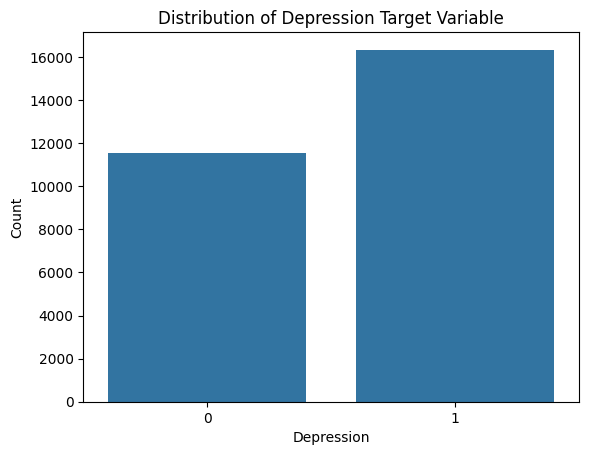

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title('Distribution of Depression Target Variable')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

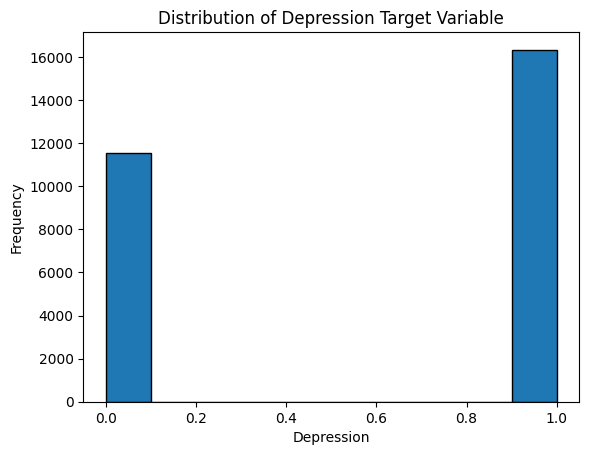

In [ ]:
plt.hist(y, bins=10, edgecolor='k')
plt.title('Distribution of Depression Target Variable')
plt.xlabel('Depression')
plt.ylabel('Frequency')
plt.show()

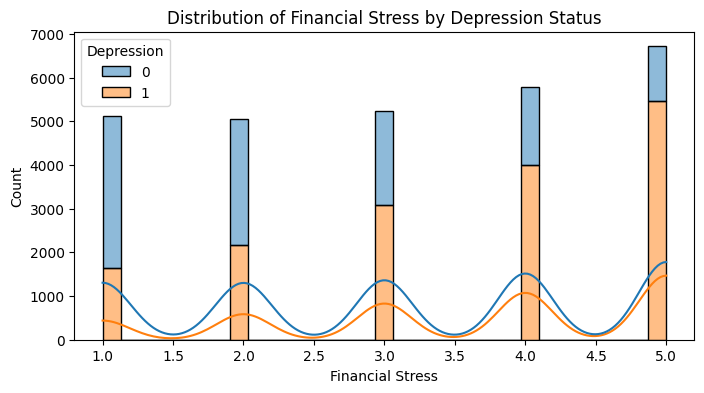

In [ ]:
numeric_cols = X.select_dtypes(include=['number']).columns
plt.figure(figsize=(8,4))
sns.histplot(data=df, x=col, hue='Depression', kde=True, multiple='stack')
plt.title(f'Distribution of {col} by Depression Status')
plt.show()

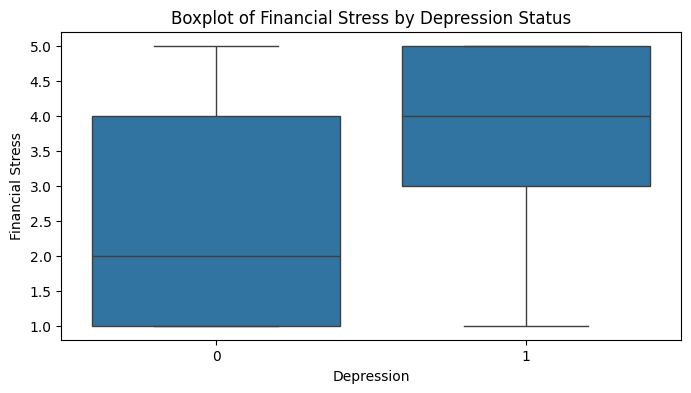

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Depression', y=col)
plt.title(f'Boxplot of {col} by Depression Status')
plt.show()

In [ ]:
correlation = df.select_dtypes(include=['number']).corr()
print(correlation)

                          id       Age  Academic Pressure  Work Pressure  \
id                  1.000000  0.003796           0.005172       0.001261   
Age                 0.003796  1.000000          -0.075788       0.002015   
Academic Pressure   0.005172 -0.075788           1.000000      -0.022231   
Work Pressure       0.001261  0.002015          -0.022231       1.000000   
CGPA               -0.012324  0.005030          -0.022239      -0.050896   
Study Satisfaction  0.007794  0.009182          -0.110988      -0.021145   
Job Satisfaction    0.001931 -0.000432          -0.024945       0.770652   
Work/Study Hours   -0.004533 -0.032912           0.096011      -0.005469   
Financial Stress    0.000785 -0.094928           0.151706       0.001883   
Depression          0.000923 -0.226417           0.474835      -0.003351   

                        CGPA  Study Satisfaction  Job Satisfaction  \
id                 -0.012324            0.007794          0.001931   
Age                 0.0

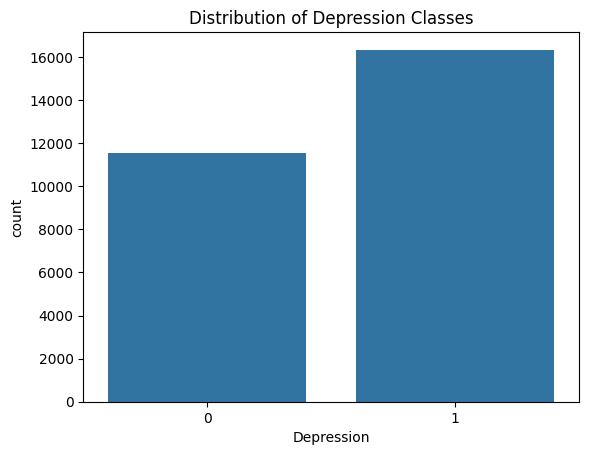

Depression class distribution:
Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression Classes')
plt.show()

print("Depression class distribution:")
print(df['Depression'].value_counts(normalize=True))

In [ ]:
import numpy as np

# Correlation of all numeric features with Depression
corr_with_target = df.select_dtypes(include='number').corr()['Depression'].sort_values(ascending=False)
print("Correlation of numeric features with Depression:")
print(corr_with_target)

# This calculates the correlation matrix between all numeric features.
# Correlation tells us how two columns are related:
# +1 → very strong positive relation (both increase together)
# -1 → very strong negative relation (one goes up, other goes down)
# 0 → no relation

# Depression (1.00) → always perfectly correlated with itself.

Correlation of numeric features with Depression:
Depression            1.000000
Academic Pressure     0.474835
Financial Stress      0.363574
Work/Study Hours      0.208561
CGPA                  0.022210
id                    0.000923
Work Pressure        -0.003351
Job Satisfaction     -0.003482
Study Satisfaction   -0.167971
Age                  -0.226417
Name: Depression, dtype: float64


In [ ]:
numeric_cols = df.select_dtypes(include='number').columns.drop('Depression')

import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y=col, data=df)
plt.title(f'{col} Distribution by Depression')
plt.show()


NameError: name 'df' is not defined

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()


In [ ]:
# Build preprocessing pipeline
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

In [ ]:
# Create a pipeline: preprocessing + logistic regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
clf = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ])

In [ ]:
OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [ ]:
# Fit model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['id', 'Age',
                                                   'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('clf', LogisticRegression(max_iter=1000))])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Redefine your preprocessor correctly
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ])

# 2. Recreate the pipeline (important!)
model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

# 3. Fit the pipeline
model.fit(X_train, y_train)

# 4. Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8408
Confusion Matrix:
[[2764  741]
 [ 592 4274]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      3505
           1       0.85      0.88      0.87      4866

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.84      8371
weighted avg       0.84      0.84      0.84      8371



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
